In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cmap = plt.get_cmap('twilight')
plt.set_cmap(cmap)

<Figure size 640x480 with 0 Axes>

In [3]:
model_loc = "../model.pt"
data_loc = "/storage/disqs/felix-ML/DataSpace/RawData/cifs2021_light/"

In [4]:
model = torch.load(model_loc)
model.eval()

VAELitModule(
  (net): Convolutional(
    (encoder): Sequential(
      (0): Linear(in_features=22271, out_features=256, bias=True)
      (1): ELU(alpha=1.0)
    )
    (fc_mu): Linear(in_features=256, out_features=10, bias=True)
    (fc_var): Linear(in_features=256, out_features=10, bias=True)
    (decoder): Sequential(
      (0): Linear(in_features=5897, out_features=256, bias=True)
      (1): ELU(alpha=1.0)
      (2): Linear(in_features=256, out_features=16384, bias=True)
      (3): Sigmoid()
    )
  )
  (train_loss): MeanMetric()
  (val_loss): MeanMetric()
  (test_loss): MeanMetric()
)

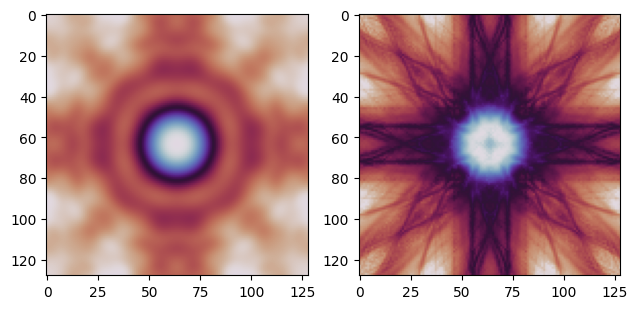

In [30]:
datapoint = np.random.choice(os.listdir(data_loc))
# input_img = np.clip(np.load(os.path.join(data_loc, datapoint, "Input.npy")), 0.0, 1.0)
# output_img = np.clip(np.load(os.path.join(data_loc, datapoint, "Output.npy")), 0.0, 1.0)

structure_factors = np.loadtxt(os.path.join(data_loc, datapoint, datapoint + "_128x128", "StructureFactors.txt"))
felix_pattern = np.clip(np.fromfile(os.path.join(data_loc, datapoint, datapoint + "_128x128", datapoint+"_+0+0+0.bin"), dtype=np.float64), 0.0, 1.0)

input_tensor = torch.from_numpy(structure_factors).float().clone().detach()
# print(input_tensor)
model_img = model.net.decode(torch.rand(1, model.net.latent_dims).cuda(), input_tensor.view(1, -1).cuda()).view(1, 128, 128).cpu().detach().numpy()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(felix_pattern.reshape((128, 128)))
axs[1].imshow(model_img.reshape(128, 128))

plt.tight_layout()
plt.show()